In [2]:
from textblob.classifiers import NaiveBayesClassifier

with open('./ready/train.csv', 'r') as fp:
    cl = NaiveBayesClassifier(fp, format='csv')

In [3]:
prob_dist = cl.prob_classify("tempatnya bagus, sangat luas")
print(cl.classify("tempatnya bagus, sangat luas"))
print(round(prob_dist.prob("pos"), 2))
print(round(prob_dist.prob("neg"), 2))

prob_dist = cl.prob_classify("banyak macet dan ramai")
print(cl.classify("banyak macet dan ramai"))
print(round(prob_dist.prob("pos"), 2))
print(round(prob_dist.prob("neg"), 2))

prob_dist = cl.prob_classify("luar biasa bagus jalannya")
print(cl.classify("luar biasa bagus jalannya"))
print(round(prob_dist.prob("pos"), 2))
print(round(prob_dist.prob("neg"), 2))

pos
0.68
0.32
neg
0.01
0.99
neg
0.27
0.73


In [7]:
cl.show_informative_features(15)

Most Informative Features
      contains(romantis) = True              pos : neg    =     14.5 : 1.0
        contains(museum) = True              neg : pos    =     13.5 : 1.0
          contains(pura) = True              neg : pos    =     12.6 : 1.0
      contains(panorama) = True              pos : neg    =     11.8 : 1.0
         contains(susah) = True              neg : pos    =     11.7 : 1.0
         contains(mitos) = True              neg : pos    =     10.9 : 1.0
          contains(tepi) = True              neg : pos    =      9.6 : 1.0
         contains(tanam) = True              neg : pos    =      8.9 : 1.0
        contains(tenang) = True              pos : neg    =      7.6 : 1.0
        contains(betapa) = True              pos : neg    =      7.1 : 1.0
         contains(asyik) = True              pos : neg    =      7.1 : 1.0
            contains(30) = True              pos : neg    =      7.1 : 1.0
      contains(struktur) = True              neg : pos    =      6.9 : 1.0

In [4]:
with open('./ready/valid.csv', 'r') as fp:
    print('Akurasi dengan menggunakan TextBlob NaiveBayes : '+str(cl.accuracy(fp, format='csv')))

Akurasi dengan menggunakan TextBlob NaiveBayes : 0.9507874015748031


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd

import matplotlib.pyplot as plt

In [12]:
datavis = pd.read_csv('./ready/valid-w-stopword - custom.csv')
print (datavis)

                                                   text label
0     candi ratu boko candi prambana hrs lestari jag...   pos
1     malam hibur kereta lampu makan jalan pohon ber...   neg
2     pura tanah lot indah hari perayaanupacara agam...   neg
3     kuil hotel unik letak lantai dasar ulas youtub...   pos
4     kota malam kelap kelip bintang langit indah ta...   pos
5     judul karna lihat parangtritis tinggipanas keb...   pos
6     seru malam odong mobil sepeda hias penuh lampu...   pos
7     pandang puncak kuil waris sempurna pandang fan...   pos
8     layak kuil hilang kingdom relevan museum pintu...   neg
9     jarak tempuh lumayan dekat kuta harga tiket ma...   pos
10    enggan jalan teman keluarga henti museum aktiv...   neg
11    tiket masuk situs turut mahal 70rb orang patun...   neg
12    terasiringnya emamng bagus sayang waktu datang...   neg
13    oleholeh wajib bakpia salah kenal bakpia patho...   neg
14    beli tiket masuk prambanan ratu boko masuk are...   pos
15    te

In [13]:
pos = []
neg = []

for index, row in datavis.iterrows():
    if cl.classify(row['text']) == 'pos':
        pos.append(row['text'])
    else:
        neg.append(row['text'])

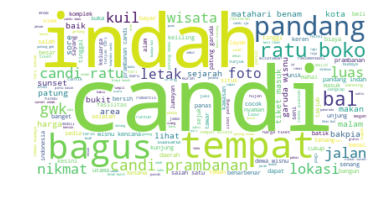

In [14]:
text = " ".join(kata for kata in pos)

wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("img/pos.png")

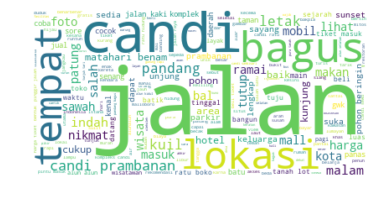

In [15]:
text = " ".join(kata for kata in neg)

wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("img/neg.png")